## <center>  Model Creat Dataframe to EXPORT from CSV<br/></center>
<a name="TOP">dev :
    Fichier CSV :  xxxxxxx.csv</a>
    
# Description Fichiers :

# Synthese des Actions :

  
**<u>MENU</u>** 
- <a href="#EDA">P0 : Mini EDA</a>
- <a href="#Import">P1 : Import CSV</a>
- <a href="#Nan">P1 : Traitement des Nan</a>
- <a href="#Nan">P2 : Filtres et calculs</a>
- <a href="#Nan">P3 : EXPORT (/DATA/EXPORT_CSV/final_xxxxxxx.csv)</a>

In [24]:
!pip install matplotlib

You should consider upgrading via the '/home/claire/.pyenv/versions/3.10.4/envs/.hcp/bin/python -m pip install --upgrade pip' command.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## <a name="EDA"></a>Partie 0 : Mini EDA &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#TOP">&uarr;</a>

emp: Emploi total

adm: Administration publique

agr: Agriculture

btp: Bâtiment et travaux publics

cie: Commerce, transports, et services divers

cre: Création artistique, spectacles, et activités récréatives

loi: Activités immobilières

dis: Activités des ménages en tant qu'employeurs

edu: Enseignement

rep: Santé humaine et action sociale

fab: Industrie manufacturière

bag: Activités financières et d'assurance

tra: Information et communication

con: Activités spécialisées, scientifiques, et techniques

san: Autres activités de services

## <a name="Import"></a>Partie 1 : Import CSV&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#TOP">&uarr;</a>

In [26]:
df = pd.read_csv('empfoncommunes.csv')
df.shape

/tmp/ipykernel_6627/2852485540.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('empfoncommunes.csv')


(34841, 190)

In [27]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34841 entries, 0 to 34840
Data columns (total 190 columns):
 #    Column       Dtype  
---   ------       -----  
 0    dep          object 
 1    nomdep       object 
 2    codecommune  object 
 3    nomcommune   object 
 4    emp1982      int64  
 5    adm1982      int64  
 6    agr1982      int64  
 7    btp1982      int64  
 8    cie1982      int64  
 9    cre1982      int64  
 10   loi1982      int64  
 11   dis1982      int64  
 12   edu1982      int64  
 13   rep1982      int64  
 14   fab1982      int64  
 15   bag1982      int64  
 16   tra1982      int64  
 17   con1982      int64  
 18   san1982      int64  
 19   res1982      int64  
 20   padm1982     float64
 21   pagr1982     float64
 22   pbtp1982     float64
 23   pcie1982     float64
 24   pcre1982     float64
 25   ploi1982     float64
 26   pdis1982     float64
 27   pedu1982     float64
 28   prep1982     float64
 29   pfab1982     float64
 30   pbag1982     float64

In [28]:
df.columns

Index(['dep', 'nomdep', 'codecommune', 'nomcommune', 'emp1982', 'adm1982',
       'agr1982', 'btp1982', 'cie1982', 'cre1982',
       ...
       'ploi2016', 'pdis2016', 'pedu2016', 'prep2016', 'pfab2016', 'pbag2016',
       'ptra2016', 'pcon2016', 'psan2016', 'pres2016'],
      dtype='object', length=190)

## <a name="Import"></a>Partie 2 : Renommer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#TOP">&uarr;</a>

In [29]:
df['codecommune'] = df['codecommune'].astype(str).str.zfill(5)

In [30]:
file_path = '../DATA/list_codecommune_leg2022_50inscrits.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file.readlines()]

print(lines[0:10], len(lines))

['01001', '01002', '01004', '01005', '01006', '01007', '01008', '01009', '01010', '01011'] 33830


In [31]:
codecommune_listdf = df['codecommune'].tolist()
absent = [x for x in lines if x not in codecommune_listdf]
len (absent)

51

In [32]:
df_filtered = df[df['codecommune'].isin(lines)]
df_filtered.shape

(33779, 190)

In [33]:
col = []
for c in df_filtered.columns:
    if ('2016' in c or '2006' in c) and not c.startswith('p'):
        col.append(c)


In [34]:
df_final = df_filtered[col]

In [35]:
df_final.columns = 'EMP_' + df_final.columns

In [36]:
df_final.head(1)

,EMP_emp2006,EMP_adm2006,EMP_agr2006,EMP_btp2006,EMP_cie2006,EMP_cre2006,EMP_loi2006,EMP_dis2006,EMP_edu2006,EMP_rep2006,...,EMP_loi2016,EMP_dis2016,EMP_edu2016,EMP_rep2016,EMP_fab2016,EMP_bag2016,EMP_tra2016,EMP_con2016,EMP_san2016,EMP_res2016
0,116.37864,9.143335,35.265633,0.0,8.0,0.0,4.0,4.100596,20.06377,4.0,...,5.0,5.030074,3.367004,9.827776,0.0,10.0,5.0,0.0,15.0,15.0


In [37]:
df_final = pd.concat([df_filtered[['dep', 'nomdep', 'codecommune', 'nomcommune']], df_final], axis = 1)

In [38]:
df_final.head(1)

,dep,nomdep,codecommune,nomcommune,EMP_emp2006,EMP_adm2006,EMP_agr2006,EMP_btp2006,EMP_cie2006,EMP_cre2006,...,EMP_loi2016,EMP_dis2016,EMP_edu2016,EMP_rep2016,EMP_fab2016,EMP_bag2016,EMP_tra2016,EMP_con2016,EMP_san2016,EMP_res2016
0,1,AIN,01001,ABERGEMENT-CLÉMENCIAT,116.37864,9.143335,35.265633,0.0,8.0,0.0,...,5.0,5.030074,3.367004,9.827776,0.0,10.0,5.0,0.0,15.0,15.0


In [15]:
df_final.isna().sum()

dep            0
nomdep         0
codecommune    0
nomcommune     0
EMP_emp2006    0
EMP_adm2006    0
EMP_agr2006    0
EMP_btp2006    0
EMP_cie2006    0
EMP_cre2006    0
EMP_loi2006    0
EMP_dis2006    0
EMP_edu2006    0
EMP_rep2006    0
EMP_fab2006    0
EMP_bag2006    0
EMP_tra2006    0
EMP_con2006    0
EMP_san2006    0
EMP_res2006    0
EMP_emp2016    0
EMP_adm2016    0
EMP_agr2016    0
EMP_btp2016    0
EMP_cie2016    0
EMP_cre2016    0
EMP_loi2016    0
EMP_dis2016    0
EMP_edu2016    0
EMP_rep2016    0
EMP_fab2016    0
EMP_bag2016    0
EMP_tra2016    0
EMP_con2016    0
EMP_san2016    0
EMP_res2016    0
dtype: int64

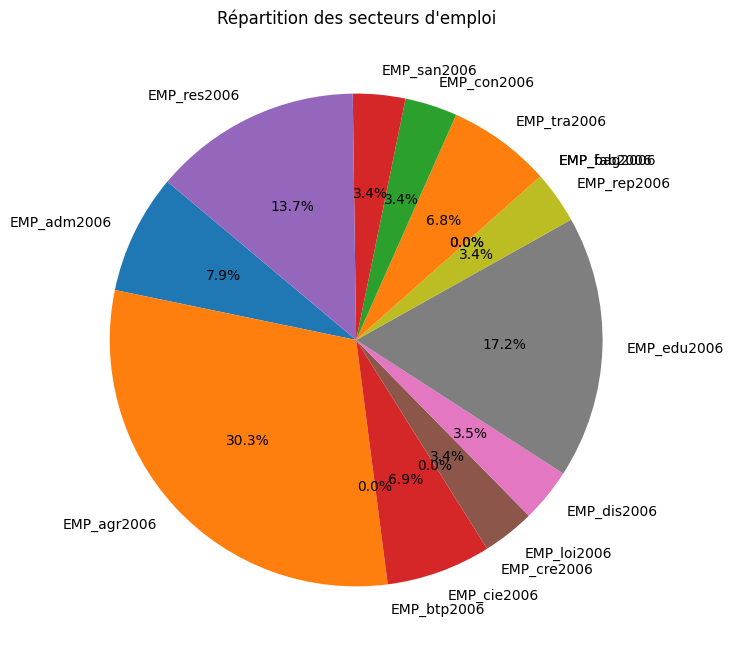

In [16]:
data = df_final[['EMP_adm2006','EMP_agr2006','EMP_btp2006','EMP_cie2006','EMP_cre2006','EMP_loi2006','EMP_dis2006','EMP_edu2006','EMP_rep2006','EMP_fab2006','EMP_bag2006','EMP_tra2006','EMP_con2006','EMP_san2006','EMP_res2006']]
total = data.sum().sum()
pourcentages = (data / total) * 100

# Créer le graphique camembert
plt.figure(figsize=(8, 8))
plt.pie(pourcentages.iloc[0], labels=pourcentages.columns, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des secteurs d\'emploi')
plt.show()

In [39]:
df_final['EMP_btp_cie2006'] = df_final.EMP_btp2006 + df_final.EMP_cie2006
df_final['EMP_btp_cie2016'] = df_final.EMP_btp2016 + df_final.EMP_cie2016


df_final['EMP_rep_con2016'] = df_final.EMP_rep2016 + df_final.EMP_con2016
df_final['EMP_rep_con2006'] = df_final.EMP_rep2006 + df_final.EMP_con2006


In [40]:
df_final = df_final.drop(['EMP_btp2006','EMP_btp2016','EMP_cie2006','EMP_cie2016'], axis=1)
df_final = df_final.drop(['EMP_rep2016','EMP_rep2006','EMP_con2016','EMP_con2006'], axis=1)

In [41]:
df_final['DBL_bug'] = 0

In [42]:
df_final.shape

(33779, 33)

In [43]:
new_row = ['*', '*', 'code', '*'] + [np.nan] * 28+[1]
len (new_row)

33

In [44]:
for i,code in enumerate(absent) :
    new_row = ['*', '*', code, '*'] + [np.nan] * 28 + [1]
    row_df = pd.DataFrame([new_row], columns=df_final.columns)
    df_final = pd.concat([df_final, row_df], ignore_index=True)
df_final.shape

(33830, 33)

## <a name="Import"></a>Partie 3 : Export CSV&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#TOP">&uarr;</a>

In [45]:
df_final.to_csv('../DATA/EXPORT_CSV/final_EMP_empfoncommunes.csv', sep = ';', index=False)